c:\Users\DianaEspinosaLozano\anaconda3\envs\thesis_venv\Lib\site-packages\demandlib\bdew\elec_slp.py:155: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7 7 7 ... 3 3 3]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  new_df.update(merged_df)
c:\Users\DianaEspinosaLozano\anaconda3\envs\thesis_venv\Lib\site-packages\demandlib\bdew\elec_slp.py:155: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0  0  0 ... 23 23 23]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  new_df.update(merged_df)
c:\Users\DianaEspinosaLozano\anaconda3\envs\thesis_venv\Lib\site-packages\demandlib\bdew\elec_slp.py:155: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0 15 30 ... 15 30 45]' has dtype incompatible with int

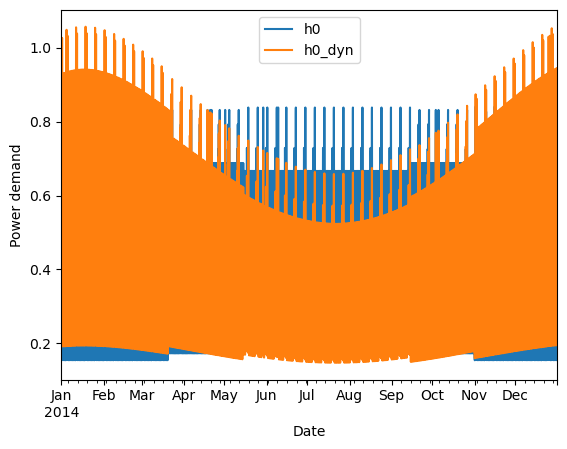

,h0,h0_dyn
2014-01-01 00:00:00,0.312930,0.388050
2014-01-01 01:00:00,0.225409,0.279539
2014-01-01 02:00:00,0.180447,0.223796
2014-01-01 03:00:00,0.164633,0.204196
2014-01-01 04:00:00,0.155064,0.192341
...,...,...
2014-12-31 19:00:00,0.749015,0.945777
2014-12-31 20:00:00,0.673585,0.850603
2014-12-31 21:00:00,0.564404,0.712789
2014-12-31 22:00:00,0.467113,0.589971


In [8]:
import pandas as pd
import strombedarf
import importlib  
importlib.reload(strombedarf)

jahr = 2014
s_bedarf = 4000

stromprofil, plt = strombedarf.get_demandlib_profil(jahr, s_bedarf)
df = pd.DataFrame()
df = stromprofil
stromprofil

In [11]:
import lastprofile_VDI4655

stromprofil_vdi = lastprofile_VDI4655.get_lastprofile(14400, 4000, 1500, 200, 5, 3)
stromprofil['neu'] = stromprofil_vdi['Strombedarf']

In [12]:
stromprofil

,h0,h0_dyn,neu
2014-01-01 00:00:00,0.312930,0.388050,0.168484
2014-01-01 01:00:00,0.225409,0.279539,0.159901
2014-01-01 02:00:00,0.180447,0.223796,0.170752
2014-01-01 03:00:00,0.164633,0.204196,0.168494
2014-01-01 04:00:00,0.155064,0.192341,0.165048
...,...,...,...
2014-12-31 19:00:00,0.749015,0.945777,0.597459
2014-12-31 20:00:00,0.673585,0.850603,0.579072
2014-12-31 21:00:00,0.564404,0.712789,0.558124
2014-12-31 22:00:00,0.467113,0.589971,0.256366


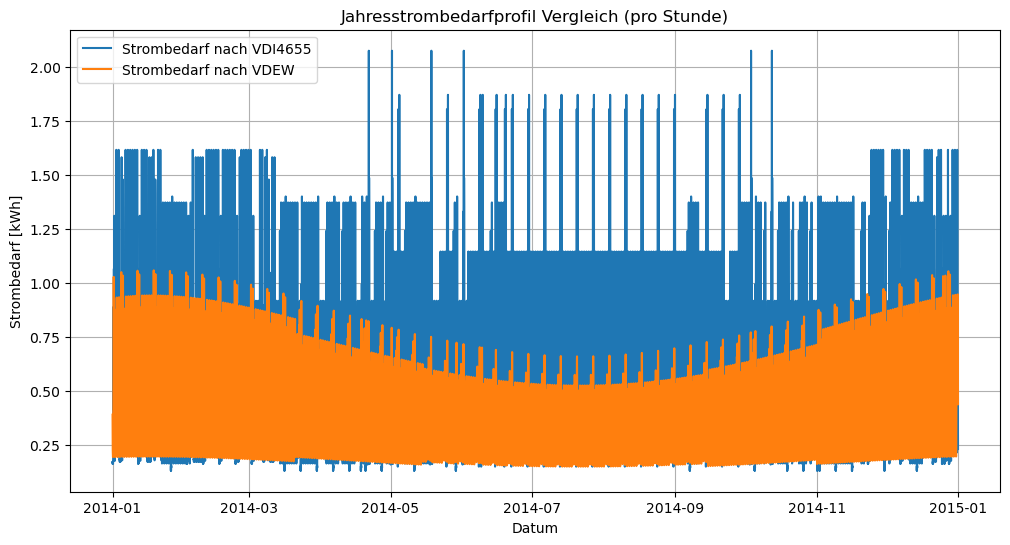

In [24]:
plt.figure(figsize=(12, 6)) 
plt.plot(stromprofil['neu'], label = 'Strombedarf nach VDI4655')
plt.plot(stromprofil['h0_dyn'], label = 'Strombedarf nach VDEW')
plt.xlabel('Datum')
plt.ylabel('Strombedarf [kWh]')
plt.title('Jahresstrombedarfprofil Vergleich (pro Stunde)')
plt.grid(True)
plt.legend()
plt.show()

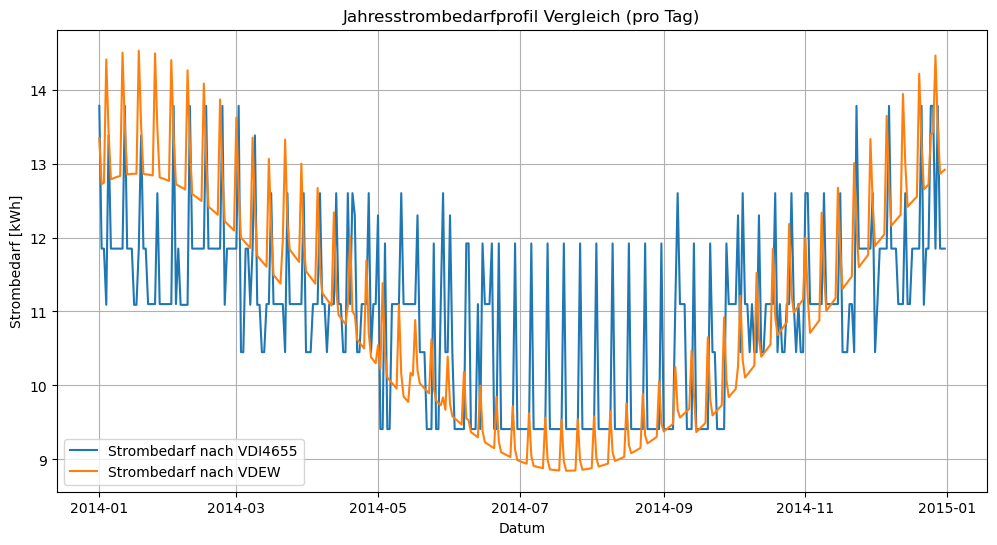

In [23]:
sp = stromprofil.resample('d').sum()
plt.figure(figsize=(12, 6)) 
plt.plot(sp['neu'], label = 'Strombedarf nach VDI4655')
plt.plot(sp['h0_dyn'], label = 'Strombedarf nach VDEW')
plt.xlabel('Datum')
plt.ylabel('Strombedarf [kWh]')
plt.title('Jahresstrombedarfprofil Vergleich (pro Tag)')
plt.grid(True)
plt.legend()
plt.show()

In [49]:
x = 15
stromprofil_vdi = lastprofile_VDI4655.get_lastprofile(14400, 4000, 1500, 200, x, 3)
stromprofil[x] = stromprofil_vdi['Strombedarf']

C:\Users\DianaEspinosaLozano\AppData\Local\Temp\ipykernel_15604\1852252774.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp = stromprofil.resample('m').sum()


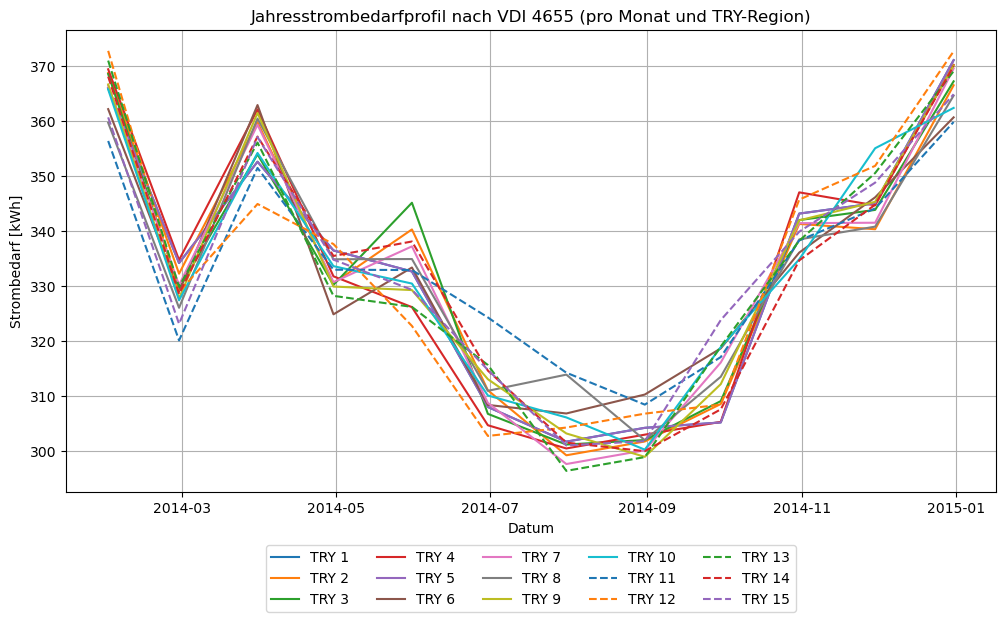

In [55]:
sp = stromprofil.resample('m').sum()
plt.figure(figsize=(12, 6)) 
plt.plot(sp['1'], label = 'TRY 1' )
plt.plot(sp[2], label = 'TRY 2' )
plt.plot(sp[3], label = 'TRY 3' )
plt.plot(sp[4], label = 'TRY 4' )
plt.plot(sp['neu'], label = 'TRY 5')
plt.plot(sp[6], label = 'TRY 6' )
plt.plot(sp[7], label = 'TRY 7' )
plt.plot(sp[8], label = 'TRY 8' )
plt.plot(sp[9], label = 'TRY 9' )
plt.plot(sp[10], label = 'TRY 10' )
plt.plot(sp[11], label = 'TRY 11', linestyle='--' )
plt.plot(sp[12], label = 'TRY 12', linestyle='--' )
plt.plot(sp['13'], label = 'TRY 13', linestyle='--' )
plt.plot(sp[14], label = 'TRY 14', linestyle='--' )
plt.plot(sp[15], label = 'TRY 15', linestyle='--' )
plt.xlabel('Datum')
plt.ylabel('Strombedarf [kWh]')
plt.title('Jahresstrombedarfprofil nach VDI 4655 (pro Monat und TRY-Region)')
plt.grid(True)
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.show()

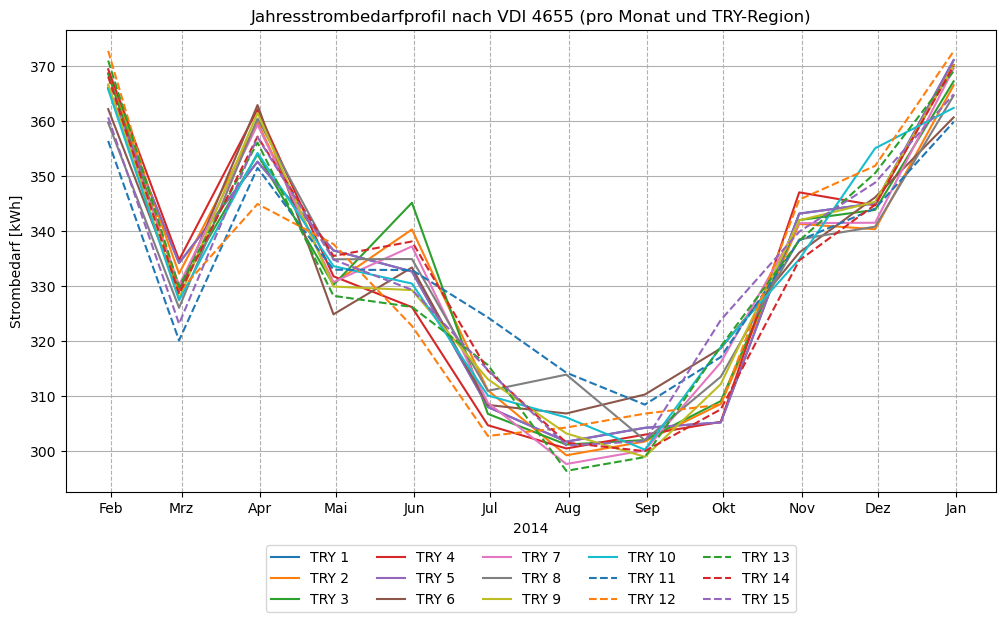

In [67]:
import matplotlib.dates as mdates
import locale

# Set the locale to German
locale.setlocale(locale.LC_TIME, 'de_DE.UTF-8')
                 
sp = stromprofil.resample('ME').sum()
plt.figure(figsize=(12, 6)) 
plt.plot(sp['1'], label = 'TRY 1' )
plt.plot(sp[2], label = 'TRY 2' )
plt.plot(sp[3], label = 'TRY 3' )
plt.plot(sp[4], label = 'TRY 4' )
plt.plot(sp['neu'], label = 'TRY 5')
plt.plot(sp[6], label = 'TRY 6' )
plt.plot(sp[7], label = 'TRY 7' )
plt.plot(sp[8], label = 'TRY 8' )
plt.plot(sp[9], label = 'TRY 9' )
plt.plot(sp[10], label = 'TRY 10' )
plt.plot(sp[11], label = 'TRY 11', linestyle='--' )
plt.plot(sp[12], label = 'TRY 12', linestyle='--' )
plt.plot(sp['13'], label = 'TRY 13', linestyle='--' )
plt.plot(sp[14], label = 'TRY 14', linestyle='--' )
plt.plot(sp[15], label = 'TRY 15', linestyle='--' )
plt.xlabel('2014')
plt.ylabel('Strombedarf [kWh]')
plt.title('Jahresstrombedarfprofil nach VDI 4655 (pro Monat und TRY-Region)')
plt.grid(True)
# Set gridlines for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at the start of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format ticks as "Month Year"
plt.grid(True, which='major', axis='x', linestyle='--')  # Enable gridlines for major ticks

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.show()